| 평가문항                                    | 상세기준                                                              |
|--------------------------------------------|---------------------------------------------------------------------|
| 1. 이미지 분류기 모델이 성공적으로 만들어졌는가? | 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음 |
| 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? | 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음 |
| 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? | 85% 이상 도달하였음                                                   |


# __가위바위보 분류기 만들기__
## Trial 1.  
내 데이터로 학습 후 → 다른 사람 데이터로 테스트

In [1]:
from PIL import Image, ImageOps 
import glob

In [2]:
# 이미지 resize 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_1/Scissor"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_1/Rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_1/Paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

101  images to be resized.
101  images resized.
138  images to be resized.
138  images resized.
124  images to be resized.
124  images resized.


In [4]:
import numpy as np
import glob
from PIL import Image
import os

def load_data(img_path):
    categories = ['scissor', 'rock', 'paper']
    img_size = 28
    color = 3
    
    # 이미지 파일의 총 수를 계산합니다.
    total_image_count = sum([len(glob.glob(f"{img_path}/{category}/*.jpg")) for category in categories])
    
    # 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(total_image_count*img_size*img_size*color, dtype=np.int32).reshape(total_image_count, img_size, img_size, color)
    labels = np.zeros(total_image_count, dtype=np.int32)

    idx = 0
    for label, category in enumerate(categories):
        for file in glob.iglob(f"{img_path}/{category}/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
            labels[idx] = label  # 가위: 0, 바위: 1, 보: 2
            idx += 1
            
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = "./trial_1"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 363 입니다.
x_train shape: (363, 28, 28, 3)
y_train shape: (363,)


라벨:  0


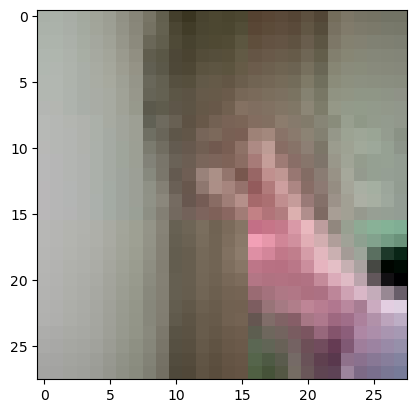

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  1


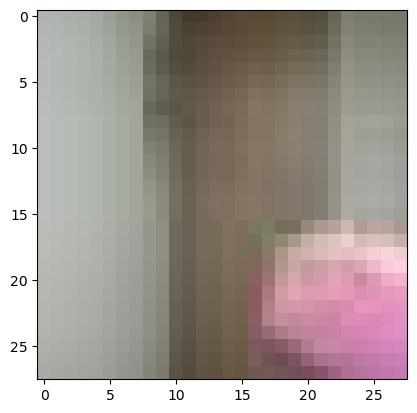

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[150])
print('라벨: ', y_train[150])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  2


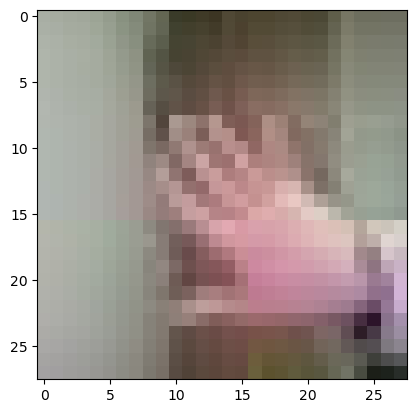

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[300])
print('라벨: ', y_train[300])   # 가위 : 0, 바위 : 1, 보 : 2

In [8]:
# 딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()




Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)


Epoch 1/10


10/10 [==============================] - 2s 41ms/step - loss: 15.0930 - accuracy: 0.3862 - val_loss: 42.1868 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 5.9823 - accuracy: 0.6000 - val_loss: 11.0280 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 1.3892 - accuracy: 0.6552 - val_loss: 2.9240 - val_accuracy: 0.2466
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2645 - accuracy: 0.9172 - val_loss: 3.6925 - val_accuracy: 0.0822
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.1105 - accuracy: 0.9586 - val_loss: 2.5340 - val_accuracy: 0.4521
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0599 - accuracy: 0.9862 - val_loss: 2.1751 - val_accuracy: 0.5753
Epoch 7/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 1.4070 - val_accuracy: 0.6438

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "trial_1/test/scissor"
resize_images(image_dir_path)

image_dir_path = "trial_1/test/rock"
resize_images(image_dir_path)

image_dir_path = "trial_1/test/paper"
resize_images(image_dir_path)

image_dir_path = "trial_1/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

100  images to be resized.
100  images resized.
102  images to be resized.
102  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 302 입니다.
x_test shape: (363, 28, 28, 3)
y_test shape: (363,)


라벨:  0


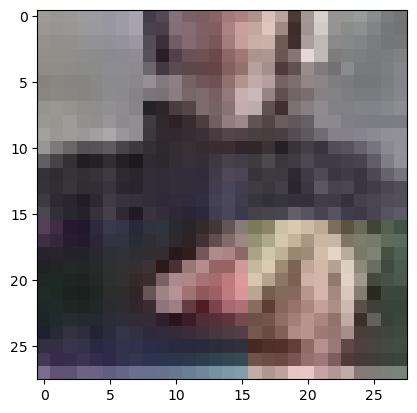

In [11]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  1


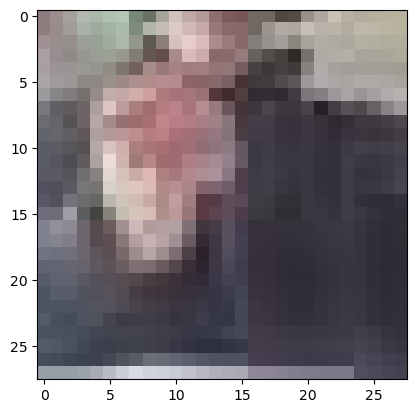

In [12]:
plt.imshow(x_test[150])
print('라벨: ', y_test[150])   # 가위 : 0, 바위 : 1, 보 : 2

라벨:  2


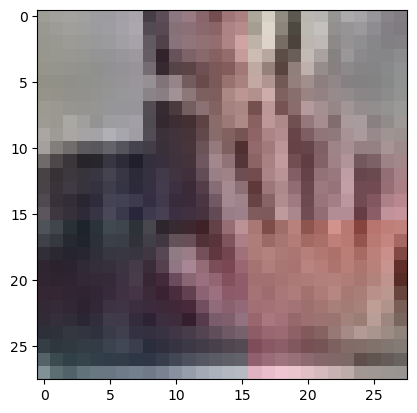

In [13]:
plt.imshow(x_test[300])
print('라벨: ', y_test[300])   # 가위 : 0, 바위 : 1, 보 : 2

In [14]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 8.5424 - accuracy: 0.2351 - 98ms/epoch - 10ms/step
test_loss: 8.542387008666992 
test_accuracy: 0.23509933054447174


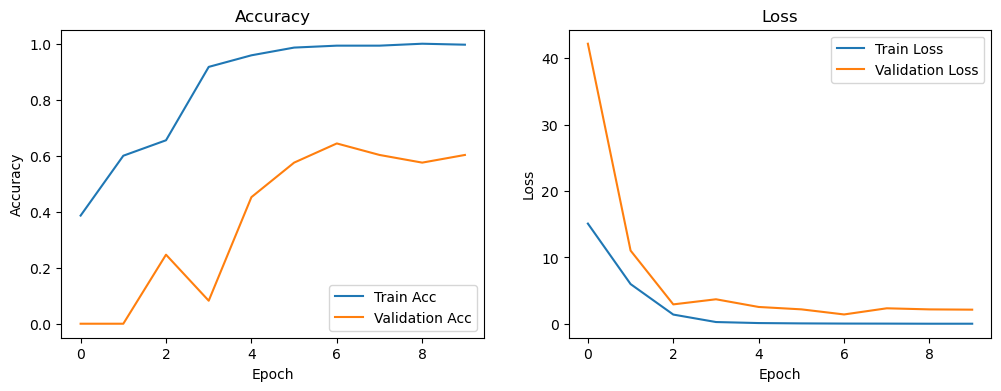

In [15]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

정확도가 24.07로 높지 않다.  
딥러닝 네트워크 설계를 변경해서 진행해보자.

In [16]:
# 딥러닝 네트워크 설계 (대호님 코드 사용)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  12
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
10/10 [==============================] - 2s 49ms/step - loss: 8.3347 - accuracy: 0.3793 - val_loss: 1.1078 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 20ms/step - loss: 2.1758 - accuracy: 0.3621 - val_loss: 1.2001 - val_accuracy: 0.1370
Epoch 3/10
10/10 [==============================] - 0s 21ms/step - loss: 1.2284 - accuracy: 0.4483 - val_loss: 1.2407 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 23ms/step - loss: 1.0373 - accuracy: 0.4828 - val_loss: 1.3135 - val_accuracy: 0.1233
Epoch 5/10
10/10 [==============================] - 0s 23ms/step - loss: 0.8988 - accuracy: 0.5655 - val_loss: 1.3887 - val_accuracy: 0.0274
Epoch 6/10
10/10 [==============================] - 0s 24ms/step - loss: 0.7476 - accuracy: 0.6414 - val_loss: 0.4593 - val_accuracy: 0.9863
Epoch 7/10
10/10 [==============================] - 0s 25ms/step - loss: 0.6058 - accuracy: 0.7414 - val_loss: 0.6198 - val_accuracy: 0.6986
Epoch

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.3273 - accuracy: 0.5265 - 154ms/epoch - 15ms/step
test_loss: 1.327309250831604 
test_accuracy: 0.5264900922775269


정확도가 24.07에서 37.75로 약간 증가했다.  
딥러닝 모델을 수정했음에도 정확도가 낮은데, 대호님이 찍으신 샘플 데이터와 내가 찍은 샘플 데이터의 각도가 매우 다르기 때문에 어느 정도 예상 가능한 결과.

## Trial 2.  
팀원 데이터 전체 합치기 → train/test data split
나, 대호님, 경표님 데이터를 모두 활용하여 학습 및 테스트를 진행해보자.  
(대호님이 만들어주신 데이터셋을 사용. 이미지 사이즈가 이미 28x28로 조정되었고, 셔플되어있다.)

In [24]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

def load_data(img_path):
    categories = ['scissor', 'rock', 'paper']
    img_size = 28
    color = 3
    
    total_image_count = sum([len(glob.glob(f"{img_path}/{category}/*.jpg")) for category in categories])
    
    imgs = np.zeros(total_image_count*img_size*img_size*color, dtype=np.int32).reshape(total_image_count, img_size, img_size, color)
    labels = np.zeros(total_image_count, dtype=np.int32)

    idx = 0
    for label, category in enumerate(categories):
        for file in glob.iglob(f"{img_path}/{category}/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx, :, :, :] = img
            labels[idx] = label
            idx += 1
            
    print("총 이미지 개수:", idx)
    return imgs, labels

image_dir_path = "./trial_2"
(x, y) = load_data(image_dir_path)
x_norm = x / 255.0

# 데이터 분리: 훈련 데이터 80%, 테스트 데이터 20%
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

총 이미지 개수: 835
x_train shape: (668, 28, 28, 3)
y_train shape: (668,)
x_test shape: (167, 28, 28, 3)
y_test shape: (167,)


In [25]:
# 딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_5 (Dense)             (

In [27]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2)

Epoch 1/20
17/17 [==============================] - 1s 24ms/step - loss: 0.4293 - accuracy: 0.8670 - val_loss: 0.3796 - val_accuracy: 0.8806
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.3488 - accuracy: 0.9195 - val_loss: 0.3247 - val_accuracy: 0.9030
Epoch 3/20
17/17 [==============================] - 0s 14ms/step - loss: 0.3138 - accuracy: 0.9120 - val_loss: 0.3091 - val_accuracy: 0.8806
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.2582 - accuracy: 0.9382 - val_loss: 0.2274 - val_accuracy: 0.9403
Epoch 5/20
17/17 [==============================] - 0s 12ms/step - loss: 0.2081 - accuracy: 0.9532 - val_loss: 0.2481 - val_accuracy: 0.9030
Epoch 6/20
17/17 [==============================] - 0s 12ms/step - loss: 0.1836 - accuracy: 0.9532 - val_loss: 0.1769 - val_accuracy: 0.9552
Epoch 7/20
17/17 [==============================] - 0s 13ms/step - loss: 0.1678 - accuracy: 0.9588 - val_loss: 0.1661 - val_accuracy: 0.9627
Epoch 8/20
17

In [28]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

6/6 - 0s - loss: 0.1940 - accuracy: 0.9521 - 44ms/epoch - 7ms/step
test_loss: 0.19402450323104858 
test_accuracy: 0.9520958065986633


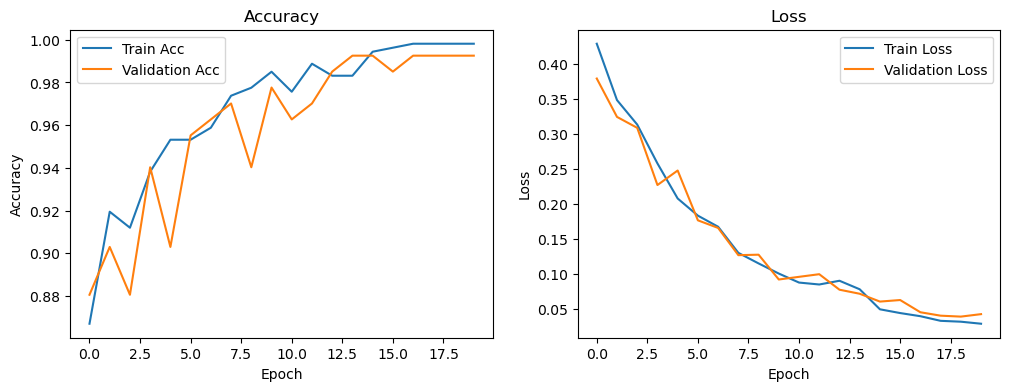

In [29]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

동일한 데이터셋을 통해 학습과 테스트를 진행했으므로 정확도가 매우 높게 측정된다.

## Trial 3.  
팀원 데이터 전체로 학습 후 → 다른 팀 데이터로 테스트  
도현님, 민지님, 예빈님 데이터셋으로 테스트

In [30]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/scissor"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./trial_3/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

265  images to be resized.
265  images resized.
284  images to be resized.
284  images resized.
286  images to be resized.
286  images resized.


In [31]:
image_dir_path = "./trial_3"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

총 이미지 개수: 835
x_train shape: (835, 28, 28, 3)
y_train shape: (835,)


In [33]:
# 딥러닝 네트워크 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_9 (Dense)             (

In [35]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_split = 0.2)

Epoch 1/30
21/21 [==============================] - 2s 22ms/step - loss: 0.6540 - accuracy: 0.8249 - val_loss: 0.6824 - val_accuracy: 0.6946
Epoch 2/30
21/21 [==============================] - 0s 10ms/step - loss: 0.1463 - accuracy: 0.9566 - val_loss: 0.2959 - val_accuracy: 0.9102
Epoch 3/30
21/21 [==============================] - 0s 13ms/step - loss: 0.0764 - accuracy: 0.9731 - val_loss: 0.2341 - val_accuracy: 0.9102
Epoch 4/30
21/21 [==============================] - 0s 13ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.2056 - val_accuracy: 0.9281
Epoch 5/30
21/21 [==============================] - 0s 14ms/step - loss: 0.0238 - accuracy: 0.9970 - val_loss: 0.1310 - val_accuracy: 0.9581
Epoch 6/30
21/21 [==============================] - 0s 15ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.1479 - val_accuracy: 0.9581
Epoch 7/30
21/21 [==============================] - 0s 14ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy: 0.9521
Epoch 8/30
21

# 회고  
다양한 시도를 해볼 수 있을 것 같은데...업데이트를 좀 더 진행해봐야겠습니다.